In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('/content/AIR_QUALITY_IN_RESIDENTIAL_AREAS.csv', encoding = 'utf-8')
dataset.head()

,State,SO2_2001,NO2_2001,RSPM_2001,SO2_2005,NO2_2005,RSPM_2005,SO2_2008,NO2_2008,RSPM_2008
0,Andhra Pradesh,12.0,25.0,73.0,7.0,32.0,83.0,8.0,26,85
1,Assam,4.0,19.0,NaN,NaN,NaN,NaN,6.0,13,89
2,Bihar,13.0,15.0,NaN,NaN,NaN,NaN,7.0,39,120
3,Chandigarh,NaN,NaN,NaN,2.0,14.0,89.0,2.0,14,89
4,Chattisgarh,13.0,28.0,NaN,12.0,26.0,119.0,16.0,28,126


# **Dataset Description**

* This dataset consist of the air quality data for different states of India. 
* This dataset contains SO2, NO2, and RSPM values in the years 2001, 2005, and 2008 for each state.

In [ ]:
# checking the shape of the dataset
dataset.shape

(27, 10)

This shows that we have 27 rows, and 10 columns.

In [ ]:
# getting the information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      27 non-null     object 
 1   SO2_2001   23 non-null     float64
 2   NO2_2001   23 non-null     float64
 3   RSPM_2001  14 non-null     float64
 4   SO2_2005   21 non-null     float64
 5   NO2_2005   21 non-null     float64
 6   RSPM_2005  21 non-null     float64
 7   SO2_2008   27 non-null     float64
 8   NO2_2008   27 non-null     int64  
 9   RSPM_2008  27 non-null     int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 2.2+ KB


The information of the dataset shows that, only the state column is of "object" type, as it stores the name of the state.

All other columns are of float64, and int64 type.

In [ ]:
# checking for null values in the dataset
dataset.isnull().sum()

State         0
SO2_2001      4
NO2_2001      4
RSPM_2001    13
SO2_2005      6
NO2_2005      6
RSPM_2005     6
SO2_2008      0
NO2_2008      0
RSPM_2008     0
dtype: int64

With this we can see that out dataset has some null values. So we need to fill those null values with the appropriate replacement.

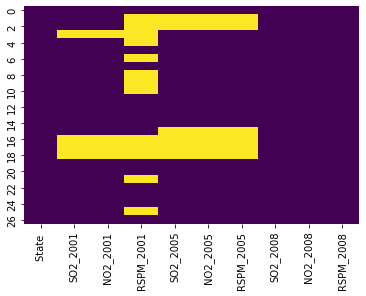

In [ ]:
# visualize the missing values in the dataset
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.show()

Now if we observe the yellow portion, there are many missing values in rspm_2001 column, while other columns have fewer missing values as compared to rspm_2001.

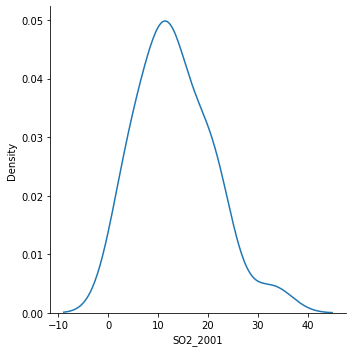

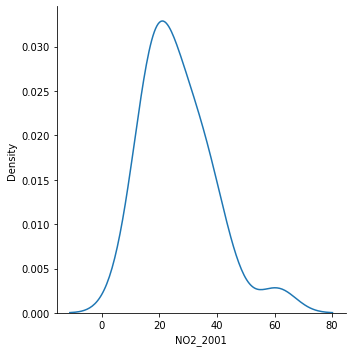

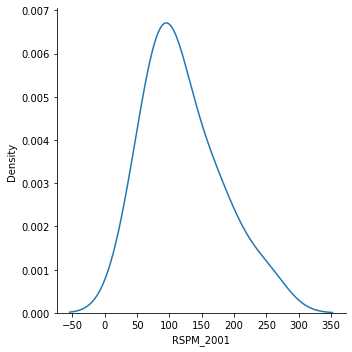

In [ ]:
# for the year 2001

sns.displot(data=dataset, x="SO2_2001", kind="kde")
sns.displot(data=dataset, x="NO2_2001", kind="kde")
sns.displot(data=dataset, x="RSPM_2001", kind="kde")
plt.show()

From the above distributions, we can figure out the mean value for each column.

SO2_2001: 13 (approx)

NO2_2001: 22 (approx)

RSPM_2001: 100 (approx)

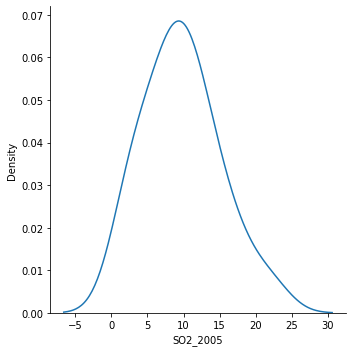

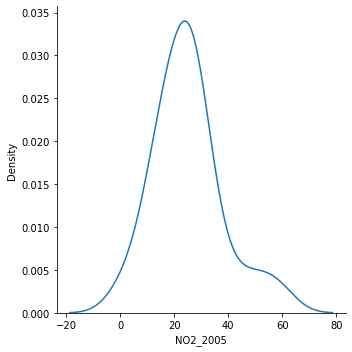

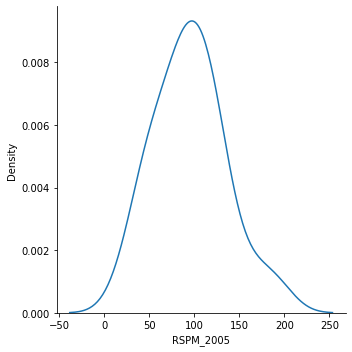

In [ ]:
# for the year 2005

sns.displot(data=dataset, x="SO2_2005", kind="kde")             # kde: kernel density estimation: This function uses Gaussian kernels
sns.displot(data=dataset, x="NO2_2005", kind="kde")
sns.displot(data=dataset, x="RSPM_2005", kind="kde")
plt.show()

From the above distributions, we can figure out the mean value for each column.

SO2_2005: 10 (approx)

NO2_2005: 28 (approx)

RSPM_2005: 100 (approx)

In [ ]:
# replacing the null values
column_list = list(dataset.columns)
for i in range(1, len(column_list)):
  dataset[column_list[i]].fillna(dataset[column_list[i]].mean(), inplace=True)

dataset.isnull().sum()

State        0
SO2_2001     0
NO2_2001     0
RSPM_2001    0
SO2_2005     0
NO2_2005     0
RSPM_2005    0
SO2_2008     0
NO2_2008     0
RSPM_2008    0
dtype: int64

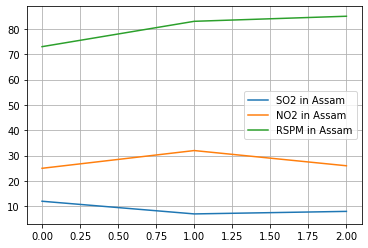

In [ ]:
# Like this we can see the variation of the Gases within the years for any state
data_for_assam = dataset.head(1)
x_SO2 = [data_for_assam['SO2_2001'], data_for_assam['SO2_2005'], data_for_assam['SO2_2008']]
x_NO2 = [data_for_assam['NO2_2001'], data_for_assam['NO2_2005'], data_for_assam['NO2_2008']]
x_RSPM = [data_for_assam['RSPM_2001'], data_for_assam['RSPM_2005'], data_for_assam['RSPM_2008']]

plt.plot(x_SO2, label = 'SO2 in Assam')
plt.plot(x_NO2, label = 'NO2 in Assam')
plt.plot(x_RSPM, label = 'RSPM in Assam')
plt.legend()
plt.grid()
plt.show()

From the graph above, we can clearly observe the patterns about the different gases in different years. 

* The SO2 emission decreases over the years in assam, from which we can say that the reduce sulphur dioxide (SO2) has effectively reduced rates of premature deaths. Sulfur dioxide affects the respiratory system, particularly lung function, and can irritate the eyes.
* The NO2 increased till 2005, then decreases to some extend till 2008, which is again a good sign in reducing air pollution.
* The RSPM (Respirable Suspended Particulate Matter) drastically increased during the period of 2001-2008. 

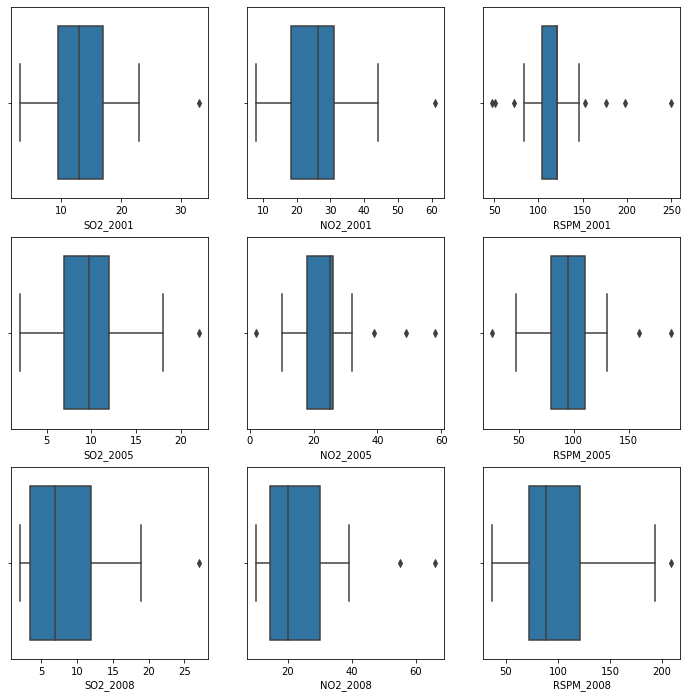

In [ ]:
# outliers detection
plt.figure(figsize=(12, 12))

columns = list(dataset.columns)

for i in range(1, len(columns)):
  plt.subplot(3, 3, i)
  sns.boxplot(dataset[columns[i]])

plt.show()

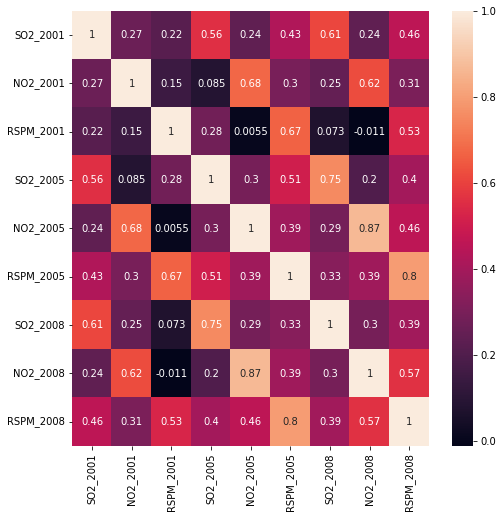

In [ ]:
# finding correlation between the columns
plt.figure(figsize=(8,8))
correlation = dataset.corr()

sns.heatmap(correlation, annot=True)
plt.show()

The correlation matrix shows that the column values of 'NO2' in 2005 and 2008 are highly positively correlated. Also the 'RSPM' values in 2005 and 2008 are also highly positively correlated.

# **Use cases of this Dataset**

* This dataset can be used to analyse the air quality at a particular state of India.
* This dataset help us to find out which state is having maximum pollution.
* This dataset contains the SO2, NO2 and RSPM values from the years 2001, 2005, and 2008. From the data values, we can see the improvement or decrement in the quality of air within the years, and find out the possible causes for it.
* From the data analysis on this dataset, we can figure out which year has the badest air quality, and figure out the solutions to improve it.
* We can also use this dataset in the field of healthcare to figure out which state has the most respiratory problems/ or the reason of deaths due to air quality.

In [ ]:
numeric_columns = dataset.drop(columns=['State '], axis=1)
string_column = dataset['State ']

# **b) Performing Normalization on the Dataset**
The process of scaling separate samples to have a unit norm (unit length vector) is known as normalisation. This technique uses **minimum** and **maximum** values for scaling of model. It is applied row-wise.

- Why Normalization?? 

It is applied when the dataset's columns have varying ranges. It aids in improving the effectiveness and dependability of a machine learning model.

Reference: https://scikit-learn.org/stable/modules/preprocessing.html

In [ ]:
print("10th Row Before the Normalization: ")
dataset.loc[9:9, :]

10th Row Before the Normalization: 


,State,SO2_2001,NO2_2001,RSPM_2001,SO2_2005,NO2_2005,RSPM_2005,SO2_2008,NO2_2008,RSPM_2008
9,Himachal Pradesh,3.0,14.0,120.5,4.0,17.0,26.0,2.0,12,71


In [ ]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalized_data = normalizer.fit_transform(numeric_columns)
normalized_dataset = pd.DataFrame(normalized_data, columns = ['SO2_2001','NO2_2001','RSPM_2001','SO2_2005','NO2_2005','RSPM_2005','SO2_2008','NO2_2008','RSPM_2008'])
normalized_dataset.insert(0, 'State', string_column)

print("10th Row After the Normalization: ")
normalized_dataset.loc[9:9, :]

10th Row After the Normalization: 


,State,SO2_2001,NO2_2001,RSPM_2001,SO2_2005,NO2_2005,RSPM_2005,SO2_2008,NO2_2008,RSPM_2008
9,Himachal Pradesh,0.020754,0.096851,0.833611,0.027672,0.117605,0.179866,0.013836,0.083015,0.491173


# **c) Performing Standardization on the Dataset**
Data must be scaled to follow standard normal distribution as part of standardisation. A distribution with a mean of 0 and a standard deviation of 1 is known as a standard normal distribution. It uses mean and standard deviation for scaling of model.

Reference: https://towardsdatascience.com/standardization-vs-normalization-dc81f23085e3#:~:text=Standardization%20entails%20scaling%20data%20to,its%20effects%20on%20some%20data.

In [ ]:
print("10th Row Before the Standardization: ")
dataset.loc[9:9, :]

10th Row Before the Normalization: 


,State,SO2_2001,NO2_2001,RSPM_2001,SO2_2005,NO2_2005,RSPM_2005,SO2_2008,NO2_2008,RSPM_2008
9,Himachal Pradesh,3.0,14.0,120.5,4.0,17.0,26.0,2.0,12,71


In [ ]:
from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()
standardized_data = standardizer.fit_transform(numeric_columns)
standardized_dataset = pd.DataFrame(standardized_data, columns = ['SO2_2001','NO2_2001','RSPM_2001','SO2_2005','NO2_2005','RSPM_2005','SO2_2008','NO2_2008','RSPM_2008'])
standardized_dataset.insert(0, 'State', string_column)

print("10th Row After the Standardization: ")
standardized_dataset.loc[9:9, :]

10th Row After the Standardization: 


,State,SO2_2001,NO2_2001,RSPM_2001,SO2_2005,NO2_2005,RSPM_2005,SO2_2008,NO2_2008,RSPM_2008
9,Himachal Pradesh,-1.546247,-1.146244,0.0,-1.258911,-0.742599,-2.032213,-1.048908,-1.002633,-0.682163


d) 

- **Which type of data is suitable for Normalization?**

    - Normalization is useful when we don't know about the distribution of features.
    - It is also useful for data having variable scaling techniques.
    - When our data values are very disturbed or there is a very large difference. Outliers in the data will be affected by normalisation because it requires an abundant range.
    

- **Which type of data is suitable for Standardization?**

    - Standardization is useful when we have the knowledge about the distribution of features.
    - It is also useful when data has variable dimensions.
    - Outliers in data won't be affected by standardisation because standardisation does not always have a bounding range.

In my opinion and analysis, Standardization on this dataset is good, because if we see the distribution graphs of the columns, we can see that they follow gaussian distribution, and in Standardization, we focus more on **mean** and **variance**. 

Ref: https://deepchecks.com/glossary/normalization-in-machine-learning/